### In this notebook plots will be presented demonstrating relationships between different features related to the rice production. The aim is to have visual support that will hint on the nature of interferences between those features and the final outcome.

The features that we consider: 

`Dist Code`: District code <br>
`Year`: Year <br>
`Dist Name`: District name <br>
`State Name`: State name <br>
`RICE AREA (1000 ha)`: Gross cropped area of rice in units of 1000 hectares <br>
`RICE YIELD (kg per ha)`: Rice yield (kg/ha) <br>
`nitrogen`: tonnes of nitogen fertilizer used <br>
`phosphate`: tonnes of phosphate fertilizer used <br>
`potash`: tonnes of potash fertilizer used <br>
`prec_grow`: Average monthly precipitation (mm) during growing season <br>
`prec_harvest`: Average monthly precipitation (mm) during harvesting season <br>
`et_grow`: Average monthly evapotranspiration (mm) during growing season <br>
`et_harvest`: Average monthly evapotranspiration (mm) during harvesting season <br>
`maxT_grow`: Average of monthly maximum temperatures (celsius) during growing season <br>
`maxT_harvest`: Average of monthly maximum temperatures (celsius) during harvesting season <br>
`minT_grow`: Average of monthly minimum temperatures (celsius) during growing season <br>
`minT_harvest`: Average of monthly minimum temperatures (celsius) during harvesting season <br>
`runoff_grow`: Mean surface runoff (mm) during growing season <br>
`runoff_harvest`: Mean surface runoff (mm) during harvesting season <br>
`windspeed_grow`: Mean wind speed (m/s) during growing season <br>
`windspeed_harvest`: Mean wind speed (m/s) during harvesting season <br>
`RICE IRRIGATED AREA (1000 ha)`: Rice-irrigated area in units of 1000 hectares <br>
`RA-IA`: Difference between cropped area and irrigated area of rice (1000 hecatres) <br>

### Relationships between features on the whole dataseta

Here we will consider visualizations of the relationships on the whole set of data that includes all the states and districts. Later we will make analogous visualizations restricted to states and provinces.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from seaborn import set_style
from pandas.plotting import scatter_matrix
import os

set_style("whitegrid")

In [2]:
rice_data = pd.read_csv('../Final_data/rice_yield.csv')
len(rice_data)

10480

## Net annual production of rice in India

Let $Y_{i,d}$ denote the yield of rice from  district $d$ during year $i$. We use $A_{i,d}$ to label the gross cropped area of rice in district $d$ during year $i$.

\begin{equation}
{\rm Net\ annual\ rice\ production\ in\ India}, P_i = \sum_{d} Y_{i,d}A_{i,d}
\end{equation}

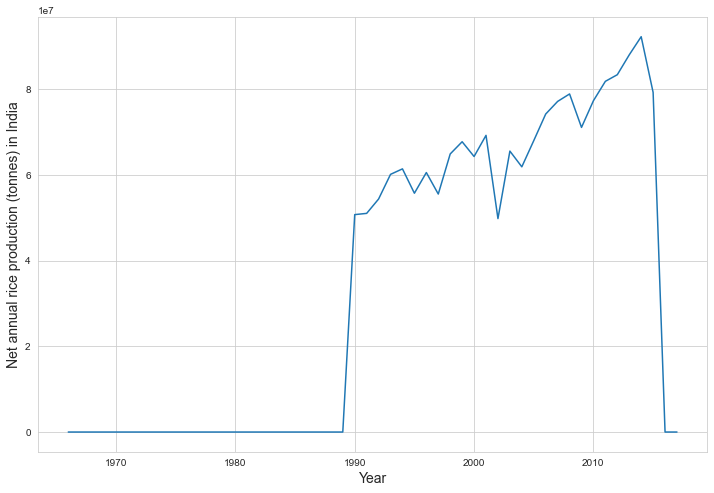

In [3]:
prod = []

for y in range(1966, 2018):
    df = rice_data[rice_data['Year'] == y]
    # Annual rice production (tonnes)
    prod.append(np.sum(df['RICE AREA (1000 ha)']*df['RICE YIELD (kg per ha)']))
    
plt.figure(figsize = (12, 8))
plt.plot(np.arange(1966, 2018), prod)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Net annual rice production (tonnes) in India', fontsize = 14)
plt.show()

## Total irrigated area by years

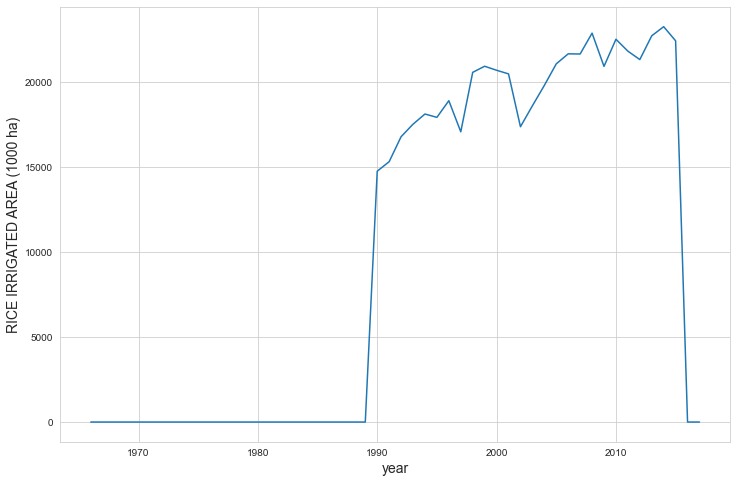

In [4]:
irr = []

for y in range(1966, 2018):
    df = rice_data[rice_data['Year'] == y]
    
    irr.append(df['RICE IRRIGATED AREA (1000 ha)'].sum())
   

plt.figure(figsize = (12, 8))

plt.plot(np.arange(1966, 2018), irr)

plt.xlabel('year', fontsize = 14)
plt.ylabel('RICE IRRIGATED AREA (1000 ha)', fontsize = 14)
plt.show()

## Rice area minus Irrigated area by years

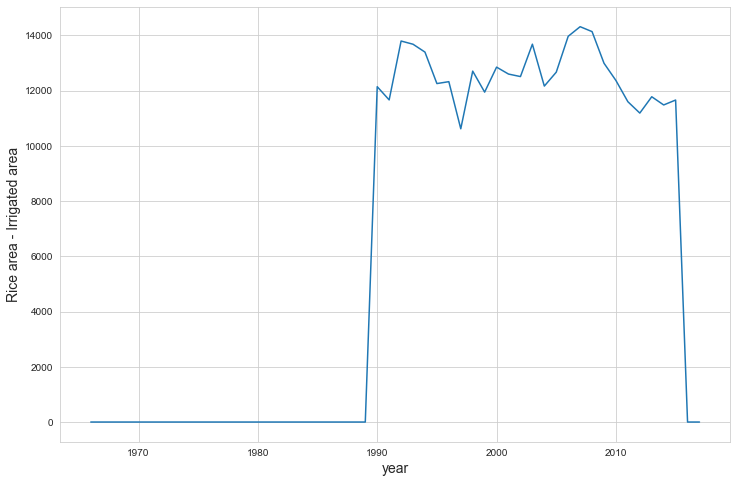

In [5]:
irr = []

for y in range(1966, 2018):
    df = rice_data[rice_data['Year'] == y]
    
    irr.append(df['RA-IA'].sum())
   

plt.figure(figsize = (12, 8))

plt.plot(np.arange(1966, 2018), irr)

plt.xlabel('year', fontsize = 14)
plt.ylabel('Rice area - Irrigated area', fontsize = 14)
plt.show()

## Irrigation vs Production per years


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14773.83, 15333.630000000001, 16805.18, 17542.98, 18140.91, 17944.41, 18926.370000000003, 17093.86, 20595.58, 20954.629999999997, 20718.25, 20505.260000000002, 17392.190000000002, 18624.47, 19824.87, 21094.72, 21685.39, 21675.58, 22904.03, 20946.54, 22544.11, 21843.9, 21347.370000000003, 22748.37, 23284.519999999997, 22452.39, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 514676.13, 478303.77, 546737.55, 583270.02, 603744.69, 582620.4099999999, 661916.6000000001, 639206.56, 731836.76, 806156.6799999999, 719441.1799999999, 776254.48, 645881.06, 812502.94, 772978.68, 793934.21, 887072.1699999999, 911510.05, 910739.08, 858291.19, 900846.3800000001, 1026354.5800000001, 1053870.32, 1066614.34, 1139519.17, 1009758.29, 0.0, 0.0]


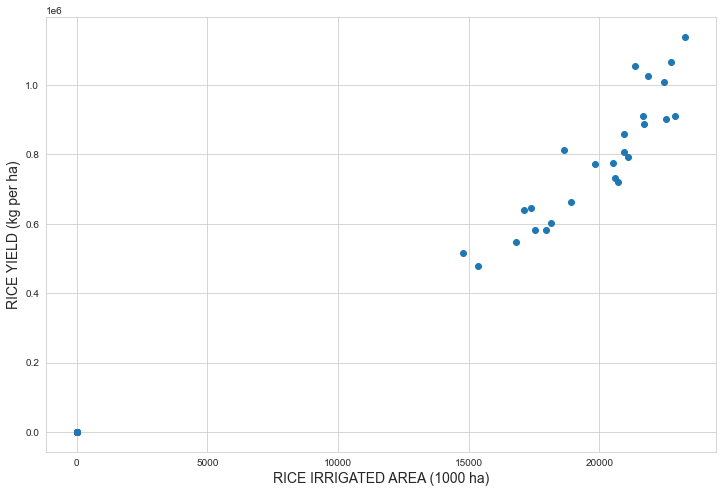

In [6]:
irr, prod = [], []

for y in range(1966, 2018):
    df = rice_data[rice_data['Year'] == y]
    
    #ry = df['RICE YIELD (kg per ha)'].sum()
    #ri = df['RICE IRRIGATED AREA (1000 ha)'].sum()
    
    irr.append(df['RICE IRRIGATED AREA (1000 ha)'].sum())
    
    prod.append(df['RICE YIELD (kg per ha)'].sum())

print(irr)

print(prod)
    
    
plt.figure(figsize = (12, 8))

plt.scatter(np.array(irr), np.array(prod))

plt.xlabel('RICE IRRIGATED AREA (1000 ha)', fontsize = 14)
plt.ylabel('RICE YIELD (kg per ha)', fontsize = 14)

plt.show()